## Imports

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

Contains list of items in each transactions

In [2]:
df = pd.read_csv('./dataset/basket.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(14963, 11)

### Cleaning null values

Lets drop the null fields and retrieve the items in each transaction into nested list

In [4]:
data = df.astype(str).values.tolist()
data

[['whole milk',
  'pastry',
  'salty snack',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['sausage',
  'whole milk',
  'semi-finished bread',
  'yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['soda',
  'pickled vegetables',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['canned beer',
  'misc. beverages',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['sausage',
  'hygiene articles',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['sausage',
  'whole milk',
  'rolls/buns',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'soda',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['frankfurter',
  'soda',
  'whipped/sour cream',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['frankfurter',
  'curd',
  'nan',
  'nan',
  'n

## Transaction Encoding

Transforms the dataset into a logical data frame. Each column represents an item and each row represent a record or a transaction for one purchase.

*TRUE* if the transaction occurs *FALSE* if not.

In [5]:
from mlxtend.preprocessing import TransactionEncoder

In [6]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [7]:
transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# drop nan column
transactions = transactions.drop(['nan'], axis = 1)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
transactions.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)

### Most popular items

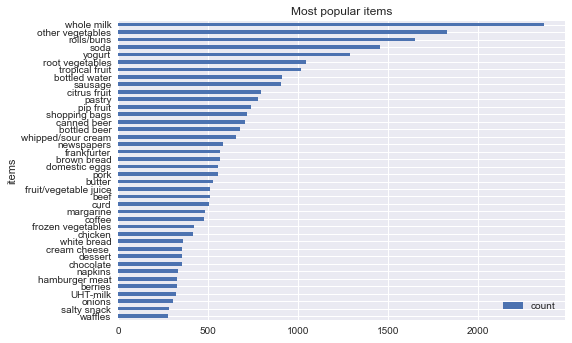

In [10]:
import matplotlib 

#most popular items
count = transactions.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(40)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {"index": "items",0: "count"})
#Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('seaborn')
ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

### Apriori Algorithm
Uses frequent item-sets to generate association rules. Based on the concept that a subset of a frequent item-set must be a frequent item-set. (frequent item-set is an item-set whose support value is greater than a threshold value specified )

In [11]:
frequent_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
frequent_items.head()

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [12]:
# add column containing number of items
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))

In [13]:
frequent_items.head()

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1


In [14]:
frequent_items.sort_values('length',ascending=False)

,support,itemsets,length
749,0.001470,"(yogurt, sausage, whole milk)",3
745,0.001136,"(whole milk, sausage, rolls/buns)",3
742,0.001203,"(whole milk, rolls/buns, other vegetables)",3
743,0.001136,"(soda, whole milk, other vegetables)",3
744,0.001136,"(yogurt, whole milk, other vegetables)",3
...,...,...,...
100,0.007819,(pot plants),1
99,0.037091,(pork),1
98,0.003208,(popcorn),1
97,0.049054,(pip fruit),1


### Measuring Association Rules
1. **Support** how frequent an item-set is in all transactions. The ratio of the number of transactions in which item x appears to the total number of transactions.

2. **Confidence** how likely items are purchased together. The likelihood of item y being purchased when the item x is purchased.

3. **Lift** how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

In [15]:
rules = association_rules(
    frequent_items,
    metric="confidence",
    min_threshold=0.001
)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009


In [16]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1210,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1226,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1109,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
1221,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
...,...,...,...,...,...,...,...,...,...
654,(whole milk),(frozen fish),0.157923,0.006817,0.001069,0.006771,0.993287,-0.000007,0.999954
958,(whole milk),(pasta),0.157923,0.008087,0.001069,0.006771,0.837316,-0.000208,0.998675
1218,(whole milk),"(soda, rolls/buns)",0.157923,0.008087,0.001002,0.006348,0.784984,-0.000275,0.998250
982,(whole milk),(pickled vegetables),0.157923,0.008955,0.001002,0.006348,0.708829,-0.000412,0.997376


In [17]:
top_40_rules = rules.sort_values('confidence', ascending=False).head(40)

### Support Matrix

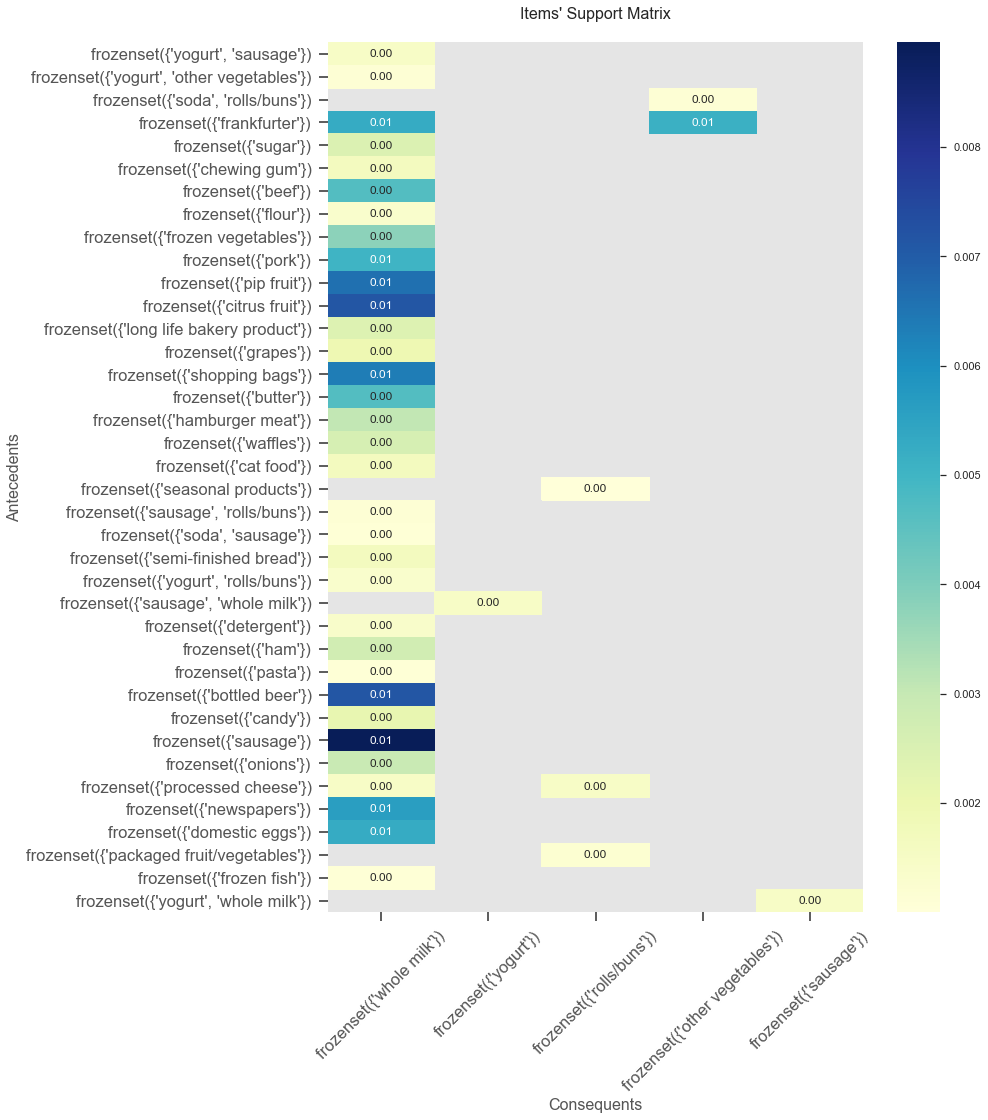

In [18]:
# plot a heatmap to know how strong the association is based on lift values
pivot_support = top_40_rules.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

### Top 3

In [19]:
rules.sort_values('confidence', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1210,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1226,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642


### Conclusion

- Most popular items *Whole milk, other vegitables, rolls/buns, and soda*.
- The confidence level of 0.25 shows that out of all the transactions containing yogurt and sausage 0.25 contain whole milk too.

So the business can give discount on whole milk if the customer buys the other two.